In [5]:
import csv

with open('Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv') as f:
    reader = csv.reader(f)
    dates = []
    all_deaths_2019 = []
    all_deaths_2020 = []
    covid_deaths = []
    for line in reader:
        if line[0] == 'United States':
            date = line[3]
            if date.startswith('2019'):
                dates.append(date[5:])
                all_deaths_2019.append(int(line[4]))
            else:
                all_deaths_2020.append(int(line[4]))
                covid_deaths.append(int(line[18]))

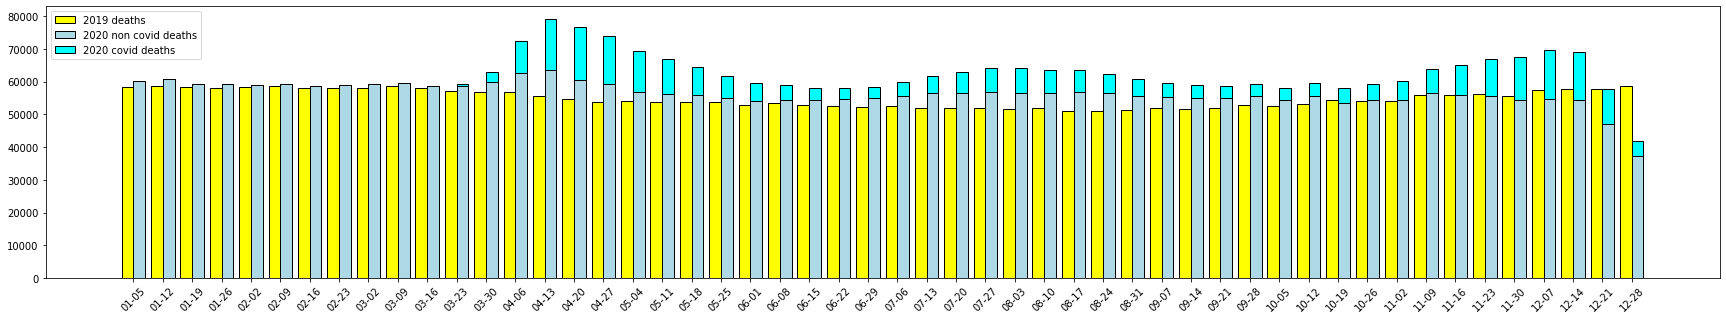

In [30]:
from matplotlib import pyplot as plt
import numpy

all_deaths_2020 = numpy.array(all_deaths_2020[:52])
covid_deaths = numpy.array(covid_deaths[:52])
width = .4
xs = numpy.arange(len(dates))


fig, ax = plt.subplots(figsize=(30, 5))
d2019 = ax.bar(xs - width/2, all_deaths_2019, width, label='2019 deaths', color='yellow', edgecolor='black')
d2020 = ax.bar(xs + width/2, all_deaths_2020-covid_deaths, width, label='2020 non covid deaths', color='lightblue', edgecolor='black')
d2020 = ax.bar(xs + width/2, covid_deaths, width, bottom=all_deaths_2020-covid_deaths, label='2020 covid deaths', color='cyan', edgecolor='black')
ax.set_xticks(xs)
ax.set_xticklabels(dates, rotation=45)
ax.legend()
plt.show()